In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import concatenate
import tifffile

from sklearn.model_selection import train_test_split

import os

import scipy

2023-03-07 08:08:55.271867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 08:08:56.859391: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 08:08:56.859416: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 08:09:00.841831: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
tiles = pd.read_csv(r'./Data/Tiles_expanded.csv')

In [24]:
tiles.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical
0,36,-122.514446,37.779636,-122.513306,37.778732,37.779184,-122.513876,0.0,0.0,0.0,0.0,0.0,0.0
1,37,-122.514446,37.778732,-122.513306,37.777829,37.778280,-122.513876,0.0,0.0,0.0,0.0,0.0,0.0
2,151,-122.513306,37.779636,-122.512166,37.778732,37.779184,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0
3,152,-122.513306,37.778732,-122.512166,37.777829,37.778280,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0
4,153,-122.513306,37.777829,-122.512166,37.776925,37.777377,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
cf = pd.unique(tiles['Collisions_Future'])

In [26]:
cf

array([ 0.,  5.,  1.,  2.,  4.,  3.,  6.,  9., 13.,  7., 11.,  8., 10.,
       16., 12., 15., 19., 17., 18.])

Balancing Dataset <br>
https://towardsdatascience.com/regression-for-imbalanced-data-with-application-edf93517247c <br>
https://datascience.stackexchange.com/questions/69085/smote-for-regression <br>
https://github.com/nickkunz/smogn

In [27]:
#import smogn

In [28]:
# rg_mtrx = []

# for i in cf:
#     if i == 0: 
#         rg_mtrx.append([i, 0, 0])
#     else: 
#         rg_mtrx.append([i, 1, 0])

In [29]:
# rg_mtrx

In [30]:
# tiles_smogn = smogn.smoter(
    
#     ## main arguments
#     data = tiles[[]],           ## pandas dataframe
#     y = 'Collisions_Future',          ## string ('header name')
#     #k = 2,                    ## positive integer (k < n)
#     drop_na_col = True,       ## boolean (True or False)
#     drop_na_row = True,       ## boolean (True or False)
#     samp_method = 'balance',  ## string ('balance' or 'extreme')
#     #replace = True,
#     rel_method = 'manual',
#     #rel_thres = 1,
#     #rel_coef = 0.01,
#     rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
# )

In [31]:
# tiles_smogn.head(5)

In [32]:
# len(tiles_smogn)

In [33]:
# len(tiles)

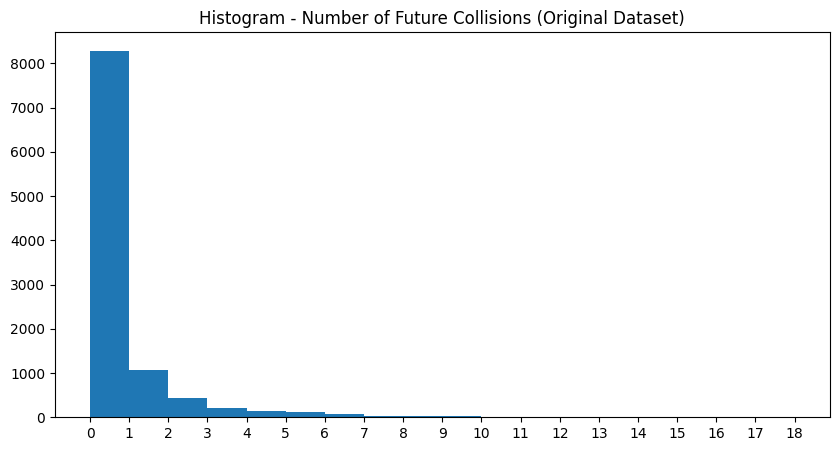

In [170]:
fig, ax = plt.subplots(figsize =(10, 5))
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
ax.hist(tiles['Collisions_Future'], bins = labels)
ax.set_xticks(labels)
plt.title('Histogram - Number of Future Collisions (Original Dataset)')
 
# Show plot
plt.show()

In [167]:
from sklearn.utils import resample

# # Separate majority and minority classes

# # why did Noriel use historical instead of future?
# df_majority = tiles.loc[tiles["Collision_binary_historical"] == 0]
# df_minority = tiles.loc[tiles["Collision_binary_historical"] == 1]
 
# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    
#                                  n_samples=int(major_count/ratio))
# df_majority_downsampled = pd.concat([df_majority_downsampled, df_minority])

# #Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     
#                                  n_samples=int(minor_count*ratio))
# df_minority_upsampled = pd.concat([df_minority_upsampled, df_majority])

set = tiles[tiles["Collisions_Future"] == 0]
sample = resample(set, replace=False, n_samples= 1000)
for c in np.arange(1,19,1):
    set = tiles[tiles["Collisions_Future"] == c]
    if c == 14:
        continue
    #elif c == 13 or c == 15:
       # df = resample(set, replace=True, n_samples= 1500)
    else: 
        df = resample(set, replace=True, n_samples= 1000)
    sample = pd.concat([sample, df])

In [36]:
sample.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical
1942,3743,-122.477962,37.755238,-122.476822,37.754335,37.754787,-122.477392,0.0,0.0,0.0,0.0,0.0,0.0
4213,6419,-122.451740,37.727227,-122.450599,37.726323,37.726775,-122.451170,0.0,0.0,0.0,0.0,0.0,0.0
8887,11516,-122.400434,37.797708,-122.399294,37.796804,37.797256,-122.399864,3.0,0.0,0.0,0.0,0.0,0.0
3577,5665,-122.458580,37.785057,-122.457440,37.784154,37.784606,-122.458010,0.0,0.0,1.0,0.0,0.0,0.0
9239,11935,-122.397014,37.730841,-122.395874,37.729938,37.730389,-122.396444,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
len(sample)

19000

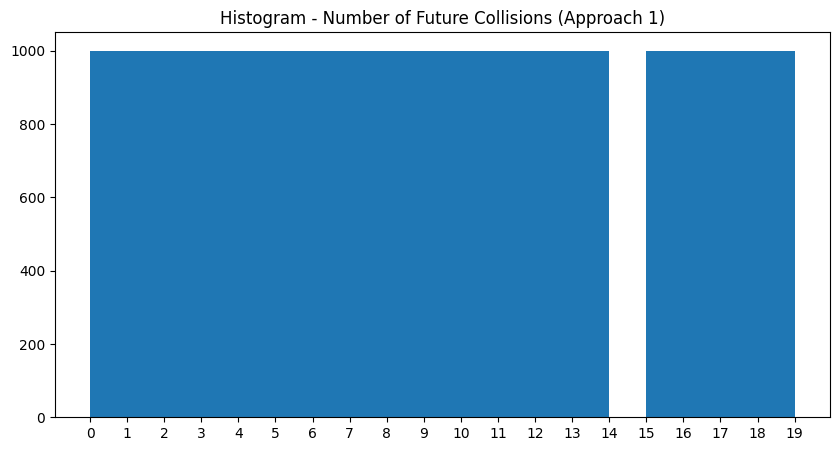

In [168]:
fig, ax = plt.subplots(figsize =(10, 5))
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.hist(sample['Collisions_Future'], bins = labels)
ax.set_xticks(labels)
plt.title('Histogram - Number of Future Collisions (Approach 1)')
 
# Show plot
plt.show()

In [39]:
#sample.to_csv('./Data/Tiles_expanded_balanced.csv', index = False) 

K-MEANS <br>
https://towardsdatascience.com/image-clustering-using-k-means-4a78478d2b83

In [ ]:
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
#from tqdm import tqdm
#import os
#import shutil
import imagecodecs
import tifffile
# Sample based on k-means clustering
from sklearn.utils import resample

In [10]:
  fname='./Satellite Imagery/Satellite Images Tiled/'
img= tifffile.imread(fname + str(36) + '.tif')[0:148, 0:188, :]
print(np.shape(img))
img = np.average(img, axis = 2)
print(np.shape(img))

(148, 188, 4)
(148, 188)


In [11]:
# Function to Extract features from the images
def features():
    #model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for id in tiles['Tile_ID']:
        fname='./Satellite Imagery/Satellite Images Tiled/'
        img= tifffile.imread(fname + str(id) + '.tif')[0:148, 0:188, :]
        img = np.average(img, axis = 2)
        #x=np.expand_dims(img,axis=0)
        #x=preprocess_input(x)
        #feat=model.predict(x, verbose = 0)
        feat=img.flatten()
        t = np.asarray(tiles[tiles['Tile_ID'] == id][['Collisions_Historical', 'Collisions_Future', 'Mid_lat','Mid_long', 'Stop_Signs', 'Paving_historical', 'Bus_stop']]).flatten()
        feat = np.append(t, feat)
        features.append(feat)
        img_name.append(id)
    return features,img_name

In [12]:
img_features,img_name=features()

In [13]:
import copy

img_features2 = copy.deepcopy(img_features)

In [114]:
img_features3 = copy.deepcopy(img_features)

In [44]:
#pd.DataFrame(img_features).to_csv('./Data/Features_concat_Kmeans.csv', index = False) 

In [150]:
# scale up the collisions future

for i in range(len(img_features3)):
    #print(img_features[i][0])
    img_features3[i][1] = (img_features3[i][1])*10000

In [151]:
img_features3[5:30]

[array([  0.      ,   0.      ,  37.783702, ..., 124.25    , 123.75    ,
        116.75    ]),
 array([  0.      ,   0.      ,  37.782798, ..., 142.25    , 142.75    ,
        144.75    ]),
 array([ 0.      ,  0.      , 37.781895, ..., 34.25    , 30.25    ,
        30.5     ]),
 array([  0.      ,   0.      ,  37.780991, ..., 159.25    , 171.75    ,
        177.      ]),
 array([  0.      ,   0.      ,  37.780088, ..., 116.5     , 129.      ,
        136.5     ]),
 array([5.0000000e+00, 5.0000000e+04, 3.7779184e+01, ..., 5.9000000e+01,
        5.1250000e+01, 3.5500000e+01]),
 array([ 0.      ,  0.      , 37.777377, ..., 76.      , 70.5     ,
        67.      ]),
 array([  2.      ,   0.      ,  37.776473, ..., 109.      , 105.5     ,
        112.5     ]),
 array([  0.     ,   0.     ,  37.77557, ..., 150.75   , 151.     ,
        151.25   ]),
 array([3.0000000e+00, 1.0000000e+04, 3.7774666e+01, ..., 1.5275000e+02,
        1.5500000e+02, 1.5500000e+02]),
 array([  0.      ,   0.      , 

In [15]:
img_features[0]

array([ 0.      ,  0.      , 37.779184, ..., 79.75    , 76.5     ,
       71.75    ])

In [47]:
len(img_features)

10471

In [118]:
np.shape(img_features3[0])

(27831,)

https://medium.com/the-data-science-publication/how-to-find-groups-within-data-using-the-k-means-algorithm-3c1d6feeacf9

In [158]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(img_features3)
y_kmeans = kmeans.labels_

/home/ubuntu/capstone/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
pd.unique(y_kmeans)

array([19,  0,  1,  5,  3,  8,  7,  9, 13, 10,  6, 14, 12,  2, 16, 15,  4,
       17, 18, 11], dtype=int32)

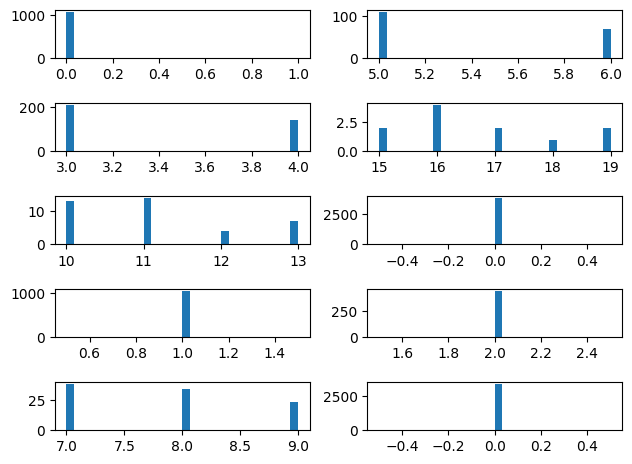

In [160]:
figure, axis = plt.subplots(5,2)
figure.tight_layout()
c = 0
for i in range(5):
    for j in range(2):
        axis[i,j].hist(tiles['Collisions_Future'][y_kmeans == c], bins=30)
        #axis[i,j].set_title('Clu)
        c += 1

In [161]:
tiles['Cluster'] = y_kmeans
tiles.head(5)

,Tile_ID,Long2,Lat2,Long1,Lat1,Mid_lat,Mid_long,Stop_Signs,Paving_historical,Paving_future,Bus_stop,Collisions_Future,Collisions_Historical,Cluster
0,36,-122.514446,37.779636,-122.513306,37.778732,37.779184,-122.513876,0.0,0.0,0.0,0.0,0.0,0.0,9
1,37,-122.514446,37.778732,-122.513306,37.777829,37.778280,-122.513876,0.0,0.0,0.0,0.0,0.0,0.0,9
2,151,-122.513306,37.779636,-122.512166,37.778732,37.779184,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0,5
3,152,-122.513306,37.778732,-122.512166,37.777829,37.778280,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0,0
4,153,-122.513306,37.777829,-122.512166,37.776925,37.777377,-122.512736,0.0,0.0,0.0,0.0,0.0,0.0,9


In [163]:
sample = pd.DataFrame()
for c in range(10):
    set = tiles[tiles['Cluster'] == c]
    df = resample(set, replace=True, n_samples= 200)
    sample = pd.concat([sample, df])

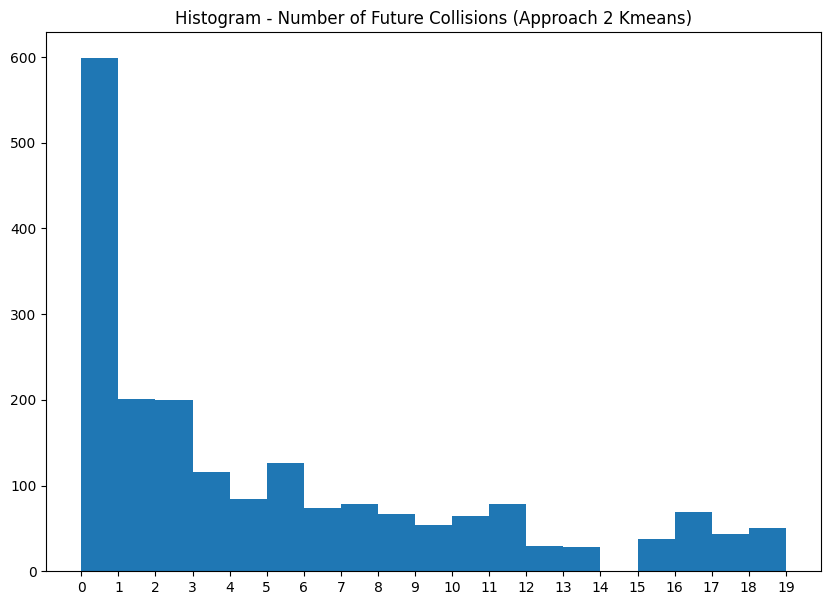

In [166]:
fig, ax = plt.subplots(figsize =(10, 7))
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
ax.hist(sample['Collisions_Future'], bins = labels)
ax.set_xticks(labels)
plt.title('Histogram - Number of Future Collisions (Approach 2 Kmeans)')
 
# Show plot
plt.show()

In [ ]:
sample.to_csv('.\Data\Tiles_expanded_balanced.csv', index = False) 